In [1]:
!pip install kagglehub

In [10]:
import os
import random
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation,Flatten,Dropout,Dense,BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import LearningRateScheduler

In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohamedchahed/dog-breeds")
data_dir = os.path.join(path, "dog-breeds", "dog_breeds")

In [18]:
level1 = os.path.join(path, os.listdir(path)[0])
print("Level 1:", level1)
print("Contents:", os.listdir(level1))
data_dir=level1


Level 1: C:\Users\Riya Mahajan\.cache\kagglehub\datasets\mohamedchahed\dog-breeds\versions\2\dog-breeds
Contents: ['beagle', 'bulldog', 'dalmatian', 'german-shepherd', 'husky', 'labrador-retriever', 'poodle', 'rottweiler']


In [14]:
data_gen=ImageDataGenerator(rescale=1./255,
                            width_shift_range=0.2,
                            validation_split=0.1,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            horizontal_flip=True,
                            vertical_flip=True,
                            zoom_range=0.2)

In [19]:
train_data=data_gen.flow_from_directory(directory=data_dir,
                                        target_size=(224,224),
                                        class_mode='categorical',
                                        subset='training')
val_data=data_gen.flow_from_directory(directory=data_dir,
                                      target_size=(224,224),
                                      class_mode='categorical',
                                      subset='validation')

Found 490 images belonging to 8 classes.
Found 51 images belonging to 8 classes.


In [24]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Load InceptionV3 with pretrained ImageNet weights
pre_trained_model = InceptionV3(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

# Freeze all layers
for layer in pre_trained_model.layers:
    layer.trainable = False


In [26]:
# Choose `mixed7` as the last layer
last_layer = pre_trained_model.get_layer('mixed7')

print('last layer output shape:', last_layer.output.shape)

last_output = last_layer.output



last layer output shape: (None, 12, 12, 768)


In [28]:
from tensorflow.keras import layers

x = layers.Flatten()(last_output)

x = layers.Dense(1024, activation='relu')(x)

x = layers.Dropout(0.2)(x)  

x = layers.Dense  (8, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 111, 111,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 109, 109,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 109, 109,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 54, 54,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 54, 54,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 52, 52,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 122,230,696 (466.27 MB)

 Trainable params: 113,255,432 (432.04 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

In [29]:
# define the set of callbacks to be passed to the model during training
# defining our scheduler
def step_decay(epoch):
    # initialize the base initial learning rate, drop factor, and
    # epochs to drop every
    initial_alpha = 0.01
    factor = 0.5
    drop_every_epoch = 5
    # compute learning rate for the current epoch
    alpha = initial_alpha * (factor ** np.floor((1+epoch) / drop_every_epoch))
    # return the learning rate
    return float(alpha)

callbacks = [LearningRateScheduler(step_decay)]

# initialize optimizer and model
print("[INFO] compiling model...")

opt = SGD(learning_rate=0.01,momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

[INFO] compiling model...


In [32]:
# Train the model.
history = model.fit(
            train_data,
            validation_data = val_data,
            epochs = 20,
            callbacks=callbacks,
            verbose = 1)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.2163 - loss: 3.6524 - val_accuracy: 0.2941 - val_loss: 1.8644 - learning_rate: 0.0100
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.3959 - loss: 1.5567 - val_accuracy: 0.4902 - val_loss: 1.2750 - learning_rate: 0.0100
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.6245 - loss: 1.0727 - val_accuracy: 0.8039 - val_loss: 0.7667 - learning_rate: 0.0100
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.7612 - loss: 0.6640 - val_accuracy: 0.6863 - val_loss: 0.8859 - learning_rate: 0.0100
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.7898 - loss: 0.5787 - val_accuracy: 0.7255 - val_loss: 0.7203 - learning_rate: 0.0050
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 7410s 494s/step - accuracy: 0.8796 - loss: 0.3521 - val_accuracy: 0.7843 - val_loss: 0.5706 - learning_rate: 0.0050
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.8898 - loss: 0.3410 - val_accura

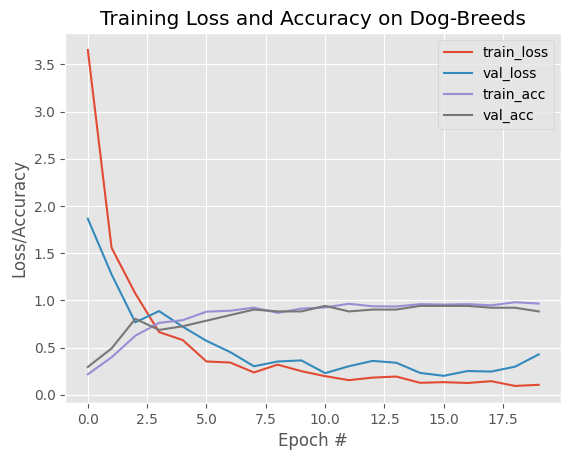

In [33]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dog-Breeds")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [37]:
model.save("dog_breed_inceptionv3.keras")


In [36]:
import json

with open("class_indices.json", "w") as f:
    json.dump(train_data.class_indices, f)
